1. Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stat
import pylab 

train_data = pd.read_csv('/content/drive/MyDrive/HealthKathon/HealthKaton/sampling_healtkathon2022/sampling_healtkathon2022.csv')

In [ ]:
print(train_data.head())

        id  id_peserta  dati2 typefaskes  usia jenkel  pisat  \
0   165666         486     17         KL    48      P    1.0   
1  1010828         520     17          A    63      L    1.0   
2   166042         523     17         KL    53      P    1.0   
3   168937         549     17         KL    54      P    1.0   
4  1005899         549     17          A    53      P    1.0   

                  tgldatang                 tglpulang  jenispel  ...  \
0  2018-07-25T17:00:00.000Z  2018-07-25T17:00:00.000Z         2  ...   
1  2019-05-27T17:00:00.000Z  2019-05-30T17:00:00.000Z         1  ...   
2  2019-07-16T17:00:00.000Z  2019-07-16T17:00:00.000Z         2  ...   
3  2019-10-17T17:00:00.000Z  2019-10-17T17:00:00.000Z         2  ...   
4  2018-04-18T17:00:00.000Z  2018-04-18T17:00:00.000Z         2  ...   

        biaya jenispulang         cbg  kelasrawat  kdsa  kdsp  kdsr  kdsi  \
0    184300.0         1.0    Q-5-42-0           3  None  None  None  None   
1  10628400.0         1.0  D

In [ ]:
print("Number of rows in training set: {}".format(len(train_data)))

Number of rows in training set: 11401882


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11401882 entries, 0 to 11401881
Data columns (total 22 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   object 
 4   usia         int64  
 5   jenkel       object 
 6   pisat        float64
 7   tgldatang    object 
 8   tglpulang    object 
 9   jenispel     int64  
 10  politujuan   object 
 11  diagfktp     object 
 12  biaya        float64
 13  jenispulang  float64
 14  cbg          object 
 15  kelasrawat   int64  
 16  kdsa         object 
 17  kdsp         object 
 18  kdsr         object 
 19  kdsi         object 
 20  kdsd         object 
 21  label        int64  
dtypes: float64(3), int64(7), object(12)
memory usage: 1.9+ GB


In [ ]:
train_data = train_data.dropna(axis=0)
train_data

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,...,184300.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,...,381600.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
5,51010,663,8,SD,50,P,1.0,2018-12-26T17:00:00.000Z,2018-12-26T17:00:00.000Z,2,...,155000.0,2.0,Q-5-33-0,3,None,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401780,10985829,8521022,229,B,0,L,4.0,2020-12-25T17:00:00.000Z,2020-12-25T17:00:00.000Z,2,...,246000.0,1.0,P-9-14-0,3,None,None,None,None,None,0
11401796,3012230,8522521,151,SC,0,P,4.0,2020-12-29T17:00:00.000Z,2020-12-29T17:00:00.000Z,2,...,308800.0,1.0,P-9-17-0,3,None,None,None,None,None,0
11401808,5635918,8523018,62,C,0,L,4.0,2020-12-23T17:00:00.000Z,2020-12-23T17:00:00.000Z,2,...,296700.0,4.0,P-9-17-0,3,None,None,None,None,None,0
11401812,2555450,8523236,136,SC,0,L,4.0,2020-12-29T17:00:00.000Z,2020-12-29T17:00:00.000Z,2,...,253300.0,1.0,P-9-14-0,3,None,None,None,None,None,0


In [ ]:
train_data = train_data[~train_data.duplicated()]

In [ ]:
train_data.nunique()

id             7183929
id_peserta     5397465
dati2              488
typefaskes          26
usia               111
jenkel               2
pisat                5
tgldatang         1096
tglpulang         1096
jenispel             2
politujuan         255
diagfktp         15460
biaya             4410
jenispulang          5
cbg                384
kelasrawat           3
kdsa                 2
kdsp                 6
kdsr                 2
kdsi                 4
kdsd                 8
label                2
dtype: int64

In [ ]:
train_data = train_data.drop(['tgldatang','tglpulang','politujuan','diagfktp','cbg','kelasrawat','kdsa','kdsp','kdsr','kdsi','kdsd'], axis=1)

In [ ]:
train_data

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,jenispel,biaya,jenispulang,label
0,165666,486,17,0,48,1,1.0,2,184300.0,1.0,0
2,166042,523,17,0,53,1,1.0,2,187300.0,1.0,0
3,168937,549,17,0,54,1,1.0,2,187300.0,1.0,0
4,1005899,549,17,1,53,1,1.0,2,381600.0,1.0,0
5,51010,663,8,2,50,1,1.0,2,155000.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11401780,10985829,8521022,229,5,0,0,4.0,2,246000.0,1.0,0
11401796,3012230,8522521,151,7,0,1,4.0,2,308800.0,1.0,0
11401808,5635918,8523018,62,4,0,0,4.0,2,296700.0,4.0,0
11401812,2555450,8523236,136,7,0,0,4.0,2,253300.0,1.0,0


In [ ]:
train_data=train_data.drop_duplicates()

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7183929 entries, 0 to 11401848
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   int64  
 4   usia         int64  
 5   jenkel       int64  
 6   pisat        float64
 7   jenispel     int64  
 8   biaya        float64
 9   jenispulang  float64
 10  label        int64  
dtypes: float64(3), int64(8)
memory usage: 657.7 MB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7183929 entries, 0 to 11401848
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   id_peserta   int64  
 2   dati2        int64  
 3   typefaskes   int64  
 4   usia         int64  
 5   jenkel       int64  
 6   pisat        float64
 7   jenispel     int64  
 8   biaya        float64
 9   jenispulang  float64
 10  label        int64  
dtypes: float64(3), int64(8)
memory usage: 657.7 MB


In [ ]:
train_data = train_data.fillna(0)

In [ ]:
columns_to_be_added_as_features=['id','id_peserta','dati2','typefaskes','usia','jenkel','pisat','jenispel','biaya','jenispulang','label']

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
X = train_data.drop(columns = ['label','id'])
y = train_data['label']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)
X_train.shape[0], X_test.shape[0]

(5747143, 1436786)

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 5697621, 1: 49522})
After SMOTE : Counter({0: 5697621, 1: 5697621})


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [ ]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.8802507819536104


col_0,0,1
label,,
0,1259611,164851
1,7203,5121


In [ ]:
# Evaluation Metrics
print('Accuracy score : ',accuracy_score(y_test, y_predict))
print('Recall score : ',recall_score(y_test, y_predict))
print('Precision score : ',precision_score(y_test, y_predict))
print('F1 score : ',f1_score(y_test, y_predict))

Accuracy score :  0.8802507819536104
Recall score :  0.41553067185978576
Precision score :  0.030128491751582612
F1 score :  0.05618335015579058


In [ ]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
rf.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_split=6,
                       n_estimators=10, n_jobs=-1)

In [ ]:
y_pred_rf = rf.predict(X_test)

Text(24.0, 0.5, 'Predicted Values')

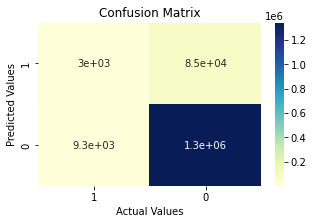

In [ ]:
#confusion matrix
tn, fp , fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()

plt.figure(figsize = (5,3)) 
sns.heatmap(np.array([tp, fp , fn, tn]).reshape(2,2),xticklabels = [1,0], yticklabels = [1,0], annot = True,cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
# Evaluation Metrics
print('Accuracy score : ',accuracy_score(y_test, y_pred_rf))
print('Recall score : ',recall_score(y_test, y_pred_rf))
print('Precision score : ',precision_score(y_test, y_pred_rf))
print('F1 score : ',f1_score(y_test, y_pred_rf))

Accuracy score :  0.9343806245328115
Recall score :  0.24626744563453423
Precision score :  0.0344780578686085
F1 score :  0.06048768821436756


In [ ]:
test_data.drop(columns = ['PassengerId', 'Survived'], inplace = True)


     -------------------------------------- 199.3/199.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
test_pred = rf.predict(test_data)

In [ ]:
pd.DataFrame({
    'PassengerId': test_df.loc[:,'PassengerId'],
    'Survived' : test_pred
}).to_csv('gender_submission_rf1.csv', index = False)